#Latar Belakang
Studi kasus mengklasifikasi gambar tas berdasarkan kepemilikan gender menggunakan CNN.

Dataset yang saya gunakan adalah data dataset buatan sendiri yang saya simpan dalam bentuk zip file di repository github saya: 

https://github.com/Clonehape/FinalProject_H8.git



##import Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from google.colab import files
from keras.preprocessing import image
from shutil import copyfile

#import PIL # untuk print  image
import pathlib #untuk save image di path

##Menyiapkan direktori

In [2]:
#unduh dataset dari github
!git clone https://github.com/Clonehape/FinalProject_H8.git

Cloning into 'FinalProject_H8'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [3]:
!unzip '/content/FinalProject_H8/tas.zip' #unzip dataset

Archive:  /content/FinalProject_H8/tas.zip
   creating: tas/
   creating: tas/Raw/
   creating: tas/Raw/tas_pria/
  inflating: tas/Raw/tas_pria/TP_ (1).jpg  
  inflating: tas/Raw/tas_pria/TP_ (10).jpg  
  inflating: tas/Raw/tas_pria/TP_ (11).jpg  
  inflating: tas/Raw/tas_pria/TP_ (12).jpg  
  inflating: tas/Raw/tas_pria/TP_ (13).jpg  
  inflating: tas/Raw/tas_pria/TP_ (14).jpg  
  inflating: tas/Raw/tas_pria/TP_ (15).jpg  
  inflating: tas/Raw/tas_pria/TP_ (16).jpg  
  inflating: tas/Raw/tas_pria/TP_ (17).jpg  
  inflating: tas/Raw/tas_pria/TP_ (18).jpg  
  inflating: tas/Raw/tas_pria/TP_ (19).jpg  
  inflating: tas/Raw/tas_pria/TP_ (2).jpg  
  inflating: tas/Raw/tas_pria/TP_ (20).jpg  
  inflating: tas/Raw/tas_pria/TP_ (21).jpg  
  inflating: tas/Raw/tas_pria/TP_ (22).jpg  
  inflating: tas/Raw/tas_pria/TP_ (23).jpg  
  inflating: tas/Raw/tas_pria/TP_ (24).jpg  
  inflating: tas/Raw/tas_pria/TP_ (25).jpg  
  inflating: tas/Raw/tas_pria/TP_ (26).jpg  
  inflating: tas/Raw/tas_pria/TP_

In [4]:
base_dir = '/content/tas' #
!ls '/content/tas' #cek isi folder dataset

Raw  Train  Validation


In [5]:
base_dir = '/content/tas' #
!ls '/content/tas' #cek isi folder dataset

Raw  Train  Validation


In [6]:
# menentukan direktori
raw_dir=os.path.join(base_dir,'Raw')
train_dir=os.path.join(base_dir,'Train')
val_dir=os.path.join(base_dir,'Validation')

In [7]:
#menentukan direktori isi raw
taspria_dir=os.path.join(raw_dir,'tas_pria/')
taswanita_dir=os.path.join(raw_dir,'tas_wanita/')

In [8]:
#menentukan direktori isi train
train_taspria=os.path.join(train_dir,'tas_pria/')
train_taswanita=os.path.join(train_dir,'tas_wanita/')

#menentukan direktori isi validasi
val_taspria=os.path.join(val_dir,'tas_pria/')
val_taswanita=os.path.join(val_dir,'tas_wanita/')

###menghitung jumlah gambar di dataset

In [9]:
data_dir = pathlib.Path(raw_dir)
image_count = len(list(data_dir.glob('*/*.jpg'))) #mengambil data image dengan ektensi jpg dengan menghitung panjang list
print (image_count)

120


In [10]:
print ('jumlah gambar tas pria:', len(os.listdir(taspria_dir)))
print ('jumlah gambar tas wanita:', len(os.listdir(taswanita_dir)))

jumlah gambar tas pria: 60
jumlah gambar tas wanita: 60


##Splitting dataset

In [11]:
split_ratio=0.9 #ratio pembagian dataset saya buat 90% untuk data training & 10% untuk validasi

In [12]:
def train_val_split(source, train, val, split_ratio):
  total_size=len(os.listdir(source))
  train_size=int(total_size*split_ratio)
  val_size=total_size-train_size

  random_split=random.sample(os.listdir(source),total_size) # memilih data secara random untuk displit
  train_files=random_split[0:train_size]
  val_files=random_split[train_size:total_size]

  for i in train_files: #membuat train files dengan ration 90%
    i_file=source+i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files: #membuat validation file
    i_file=source+i
    destination = val + i
    copyfile(i_file, destination)  


In [13]:
#pembagian file gambar untuk training & validasi

#Training
source_00=taspria_dir
train_00=train_taspria
val_00=val_taspria
train_val_split(source_00, train_00, val_00, split_ratio)


#validasi
source_01=taswanita_dir
train_01=train_taswanita
val_01=val_taswanita
train_val_split(source_01, train_01, val_01, split_ratio)

In [14]:
#cek jumlah image pada folder training & validasi
image_train = len(list(pathlib.Path(train_dir).glob('*/*.jpg'))) #mengambil data image dengan ektensi jpg dengan menghitung panjang list
image_val = len(list(pathlib.Path(val_dir).glob('*/*.jpg')))

print ('jumlah gambar train : {}'.format(image_train))
print ('jumlah gambar validasi : {}'.format(image_val))

jumlah gambar train : 108
jumlah gambar validasi : 12


In [15]:
#ukuran imagenya 
IMG_WIDTH =180
IMG_HEIGHT=180
batch_size=10

In [16]:
#data training
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 108 files belonging to 2 classes.


In [17]:
#data validasi
val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 12 files belonging to 2 classes.


In [18]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  break

(10, 180, 180, 3)


In [19]:
#assigned class name
class_names= train_dataset.class_names
print(class_names)

['tas_pria', 'tas_wanita']


##Preprocessing & Reshaping

In [20]:
# mempercepat load image
AUTOTUNE=tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds= val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:

normalization_layer=layers.experimental.preprocessing.Rescaling(1./255)

In [22]:
normalized_dataset=train_dataset.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image=image_batch[0]

print (np.min(first_image),np.max(first_image))

0.0 1.0


In [23]:
#augmentasi image untuk melatih sistem agar bisa mengenali berbagai jenis kondisi dataset.
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    zoom_range=0.1
)

val_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    zoom_range=0.1
)

###Target

In [24]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH,IMG_HEIGHT),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator= val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH,IMG_HEIGHT),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 108 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [25]:
#menggunakan callback untuk membatasi iterasi epochs apabila nilai akurasi sudah mencapai batas yang diinginkan. disini saya setting supaya iterasi berhenti ketika akurasi mencapai >95%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print('\nAkurasi mencapai >95%')
      self.model.stop_training=True

callbacks=myCallback()      

##Model CNN

In [26]:
#membuat model CNN dengan 3 layers convolutional dan aktivasi relu
num_classes =2

model = Sequential([
                    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
                    layers.Conv2D(16,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'), #hidden layer
                    layers.Dropout(0.3,seed=112),
                    layers.Dense(256, activation='relu'), #hidden layer
                    layers.Dropout(0.5,seed=112),
                    layers.Dense(num_classes,activation='sigmoid')#layer output
])

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0

In [29]:
epochs=40
history = model.fit(
    train_generator,
    steps_per_epoch = 6,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    epochs=epochs,
    callbacks=[callbacks]
)

Epoch 1/40
6/6 [==============================] - 4s 470ms/step - loss: 1.0245 - accuracy: 0.4828 - val_loss: 0.6851 - val_accuracy: 0.7000
Epoch 2/40
6/6 [==============================] - 2s 398ms/step - loss: 0.6929 - accuracy: 0.4828 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/40
6/6 [==============================] - 2s 410ms/step - loss: 0.7025 - accuracy: 0.5333 - val_loss: 0.7018 - val_accuracy: 0.4000
Epoch 4/40
6/6 [==============================] - 3s 409ms/step - loss: 0.6886 - accuracy: 0.5833 - val_loss: 0.6855 - val_accuracy: 0.8000
Epoch 5/40
6/6 [==============================] - 2s 405ms/step - loss: 0.6645 - accuracy: 0.6167 - val_loss: 0.6448 - val_accuracy: 0.8000
Epoch 6/40
6/6 [==============================] - 2s 399ms/step - loss: 0.6802 - accuracy: 0.5667 - val_loss: 0.6044 - val_accuracy: 0.7000
Epoch 7/40
6/6 [==============================] - 2s 394ms/step - loss: 0.6311 - accuracy: 0.6552 - val_loss: 0.7150 - val_accuracy: 0.5000
Epoch 8/40
6/6 [====

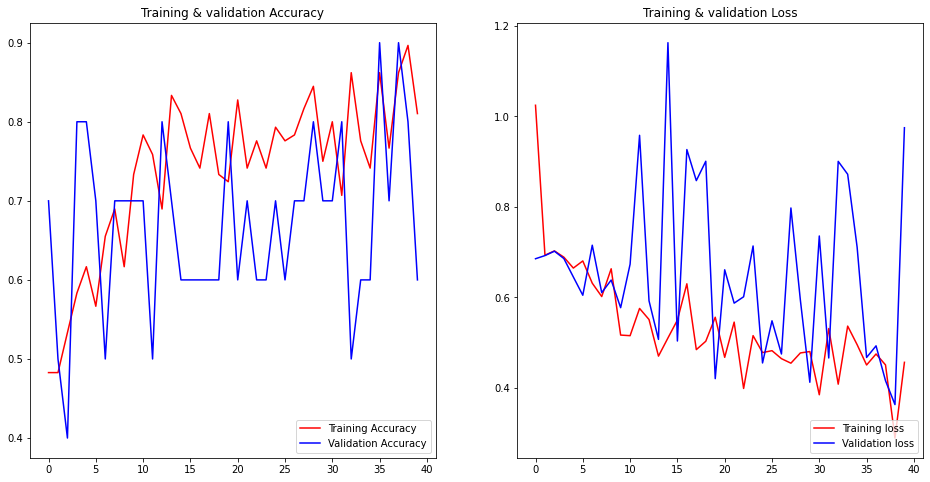

In [30]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(len(acc))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc,'r', label= 'Training Accuracy')
plt.plot(epochs_range, val_acc,'b', label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss,'r', label='Training loss')
plt.plot(epochs_range, val_loss,'b', label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training & validation Loss')

plt.show()

##Prediksi

Saving TP_ (1).jpg to TP_ (1).jpg
gambar ini adalah tas_pria dengan akurasi 73.105860 % 


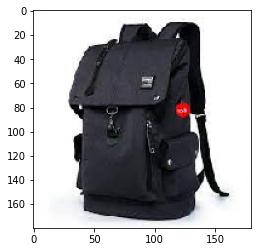

In [31]:



#upload gambar dari direktori local dan menyimpannya di drive
uploaded=files.upload()  
for fn in uploaded.keys():
  path=fn
  img=image.load_img(path, target_size=(IMG_WIDTH,IMG_HEIGHT))
  imgplot=plt.imshow(img)
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=1)

img_array = keras.preprocessing.image.img_to_array(img)
img_array= tf.expand_dims(img_array,0)

#prediksi gambar
#class_names=os.listdir(train_dir)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print (
    'gambar ini adalah {} dengan akurasi {:2f} % '
    .format(class_names[np.argmax(score)],100*np.max(score))
)  

##Save model

In [32]:
model.save('/content/model.h5')

In [33]:
model.save('./test_model',save_format='tf')

INFO:tensorflow:Assets written to: ./test_model/assets
